In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration4').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/11 02:05:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
#read file
df = spark.read.csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv', header=True, inferSchema=True)

In [4]:
df.show()

+---+----+-----+---+----+-----+----+---+---+---+---+----+------+-----+----+---+----+------------+
| No|year|month|day|hour|PM2.5|PM10|SO2|NO2| CO| O3|TEMP|  PRES| DEWP|RAIN| wd|WSPM|     station|
+---+----+-----+---+----+-----+----+---+---+---+---+----+------+-----+----+---+----+------------+
|  1|2013|    3|  1|   0|    4|   4|  4|  7|300| 77|-0.7|  1023|-18.8|   0|NNW| 4.4|Aotizhongxin|
|  2|2013|    3|  1|   1|    8|   8|  4|  7|300| 77|-1.1|1023.2|-18.2|   0|  N| 4.7|Aotizhongxin|
|  3|2013|    3|  1|   2|    7|   7|  5| 10|300| 73|-1.1|1023.5|-18.2|   0|NNW| 5.6|Aotizhongxin|
|  4|2013|    3|  1|   3|    6|   6| 11| 11|300| 72|-1.4|1024.5|-19.4|   0| NW| 3.1|Aotizhongxin|
|  5|2013|    3|  1|   4|    3|   3| 12| 12|300| 72|  -2|1025.2|-19.5|   0|  N|   2|Aotizhongxin|
|  6|2013|    3|  1|   5|    5|   5| 18| 18|400| 66|-2.2|1025.6|-19.6|   0|  N| 3.7|Aotizhongxin|
|  7|2013|    3|  1|   6|    3|   3| 18| 32|500| 50|-2.6|1026.5|-19.1|   0|NNE| 2.5|Aotizhongxin|
|  8|2013|    3|  1|

In [5]:
df.printSchema()

root
 |-- No: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- PM2.5: string (nullable = true)
 |-- PM10: string (nullable = true)
 |-- SO2: string (nullable = true)
 |-- NO2: string (nullable = true)
 |-- CO: string (nullable = true)
 |-- O3: string (nullable = true)
 |-- TEMP: string (nullable = true)
 |-- PRES: string (nullable = true)
 |-- DEWP: string (nullable = true)
 |-- RAIN: string (nullable = true)
 |-- wd: string (nullable = true)
 |-- WSPM: string (nullable = true)
 |-- station: string (nullable = true)



In [3]:
#To float datatype
from pyspark.sql.functions import col
from pyspark.sql.types import FloatType

df = df.withColumn("PM25", col("`PM2.5`").cast(FloatType()))
df = df.withColumn("PM10", col("PM10").cast(FloatType()))
df = df.withColumn("SO2", col("SO2").cast(FloatType()))
df = df.withColumn("NO2", col("NO2").cast(FloatType()))
df = df.withColumn("CO", col("CO").cast(FloatType()))
df = df.withColumn("O3", col("O3").cast(FloatType()))
df = df.withColumn("TEMP", col("TEMP").cast(FloatType()))
df = df.withColumn("PRES", col("PRES").cast(FloatType()))
df = df.withColumn("DEWP", col("DEWP").cast(FloatType()))
df = df.withColumn("RAIN", col("RAIN").cast(FloatType()))
df = df.withColumn("WSPM", col("WSPM").cast(FloatType()))
column_to_delete = "PM2.5"
df = df.drop(column_to_delete)
df.printSchema()

root
 |-- No: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- PM10: float (nullable = true)
 |-- SO2: float (nullable = true)
 |-- NO2: float (nullable = true)
 |-- CO: float (nullable = true)
 |-- O3: float (nullable = true)
 |-- TEMP: float (nullable = true)
 |-- PRES: float (nullable = true)
 |-- DEWP: float (nullable = true)
 |-- RAIN: float (nullable = true)
 |-- wd: string (nullable = true)
 |-- WSPM: float (nullable = true)
 |-- station: string (nullable = true)
 |-- PM25: float (nullable = true)



In [8]:
target = "PM25"
column_description = df.describe([target])
column_description.show()

+-------+-----------------+
|summary|             PM25|
+-------+-----------------+
|  count|            34139|
|   mean|82.77361082658466|
| stddev|82.13569353795498|
|    min|              3.0|
|    max|            898.0|
+-------+-----------------+



In [9]:
column_names = df.columns

for column_name in column_names:
    column_description = df.describe([column_name])
    print(f"Column Name: {column_name}")
    column_description.show()

Column Name: No
+-------+-----------------+
|summary|               No|
+-------+-----------------+
|  count|            35064|
|   mean|          17532.5|
| stddev|10122.24925597073|
|    min|                1|
|    max|            35064|
+-------+-----------------+

Column Name: year
+-------+------------------+
|summary|              year|
+-------+------------------+
|  count|             35064|
|   mean| 2014.662559890486|
| stddev|1.1772134318242622|
|    min|              2013|
|    max|              2017|
+-------+------------------+

Column Name: month
+-------+-----------------+
|summary|            month|
+-------+-----------------+
|  count|            35064|
|   mean|6.522929500342231|
| stddev|3.448752360047857|
|    min|                1|
|    max|               12|
+-------+-----------------+

Column Name: day
+-------+------------------+
|summary|               day|
+-------+------------------+
|  count|             35064|
|   mean|15.729637234770705|
| stddev|  8.8002

Column Name: wd
+-------+-----+
|summary|   wd|
+-------+-----+
|  count|35064|
|   mean| null|
| stddev| null|
|    min|    E|
|    max|  WSW|
+-------+-----+



Column Name: WSPM
+-------+------------------+
|summary|              WSPM|
+-------+------------------+
|  count|             35050|
|   mean| 1.708496432932952|
| stddev|1.2040710705547837|
|    min|               0.0|
|    max|              11.2|
+-------+------------------+

Column Name: station
+-------+------------+
|summary|     station|
+-------+------------+
|  count|       35064|
|   mean|        null|
| stddev|        null|
|    min|Aotizhongxin|
|    max|Aotizhongxin|
+-------+------------+

Column Name: PM25
+-------+-----------------+
|summary|             PM25|
+-------+-----------------+
|  count|            34139|
|   mean|82.77361082658466|
| stddev|82.13569353795498|
|    min|              3.0|
|    max|            898.0|
+-------+-----------------+



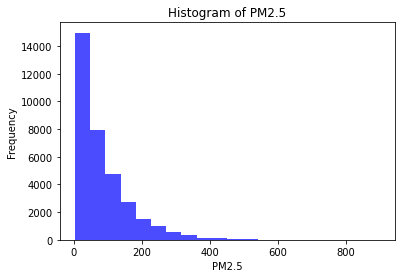

In [10]:
import matplotlib.pyplot as plt
hist_data = df.select("PM25").rdd.flatMap(lambda x: x).histogram(20)
hist_values = hist_data[1]
hist_bins = hist_data[0]
plt.hist(hist_bins[:-1], bins=hist_bins, weights=hist_values, color='blue', alpha=0.7)
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.title("Histogram of PM2.5")
plt.show()

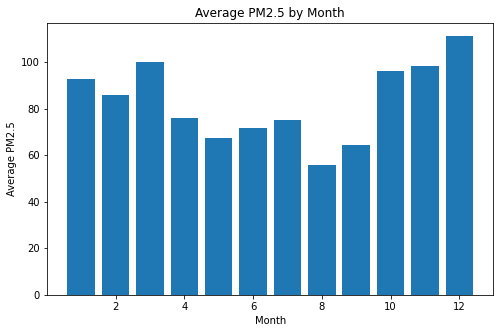

In [11]:
from pyspark.sql.functions import avg
import matplotlib.pyplot as plt

avg_pm25_by_month = df.groupBy('month').agg(avg('PM25').alias('avg_PM2.5'))
avg_pm25_pandas = avg_pm25_by_month.toPandas()

plt.figure(figsize=(8, 5))
plt.bar(avg_pm25_pandas['month'], avg_pm25_pandas['avg_PM2.5'])
plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.title("Average PM2.5 by Month")
plt.show()

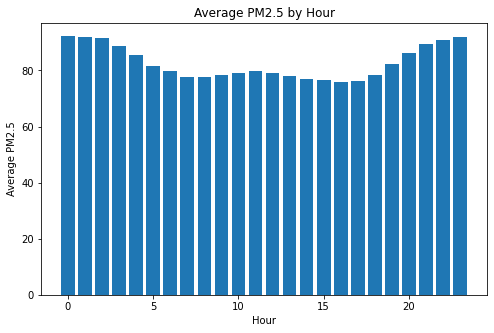

In [12]:
avg_pm25_by_hour = df.groupBy('hour').agg(avg('PM25').alias('avg_PM2.5'))
avg_pm25_pandas = avg_pm25_by_hour.toPandas()

plt.figure(figsize=(8, 5))
plt.bar(avg_pm25_pandas['hour'], avg_pm25_pandas['avg_PM2.5'])
plt.xlabel("Hour")
plt.ylabel("Average PM2.5")
plt.title("Average PM2.5 by Hour")
plt.show()

In [13]:
#missing count
from pyspark.sql.functions import col, count, when, sum

missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
missing_values.show()

+---+----+-----+---+----+----+---+----+----+----+----+----+----+----+---+----+-------+----+
| No|year|month|day|hour|PM10|SO2| NO2|  CO|  O3|TEMP|PRES|DEWP|RAIN| wd|WSPM|station|PM25|
+---+----+-----+---+----+----+---+----+----+----+----+----+----+----+---+----+-------+----+
|  0|   0|    0|  0|   0| 718|935|1023|1776|1719|  20|  20|  20|  20|  0|  14|      0| 925|
+---+----+-----+---+----+----+---+----+----+----+----+----+----+----+---+----+-------+----+



In [4]:
#drop missing
df = df.dropna()
num_rows = df.count()
num_columns = len(df.columns)
print(f"rows: {num_rows}, columns: {num_columns}")

rows: 31876, columns: 18


In [5]:
#drop columns
column_to_delete = ["station", "wd"]
df = df.drop(*column_to_delete)
df.printSchema()

root
 |-- No: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- PM10: float (nullable = true)
 |-- SO2: float (nullable = true)
 |-- NO2: float (nullable = true)
 |-- CO: float (nullable = true)
 |-- O3: float (nullable = true)
 |-- TEMP: float (nullable = true)
 |-- PRES: float (nullable = true)
 |-- DEWP: float (nullable = true)
 |-- RAIN: float (nullable = true)
 |-- WSPM: float (nullable = true)
 |-- PM25: float (nullable = true)



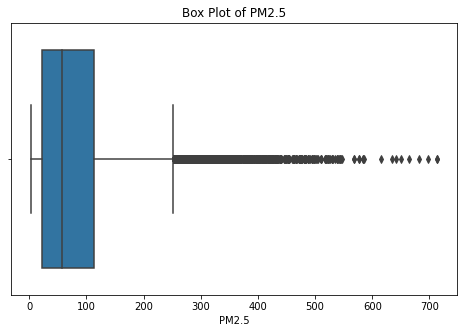

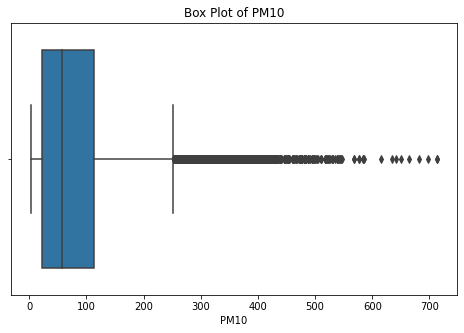

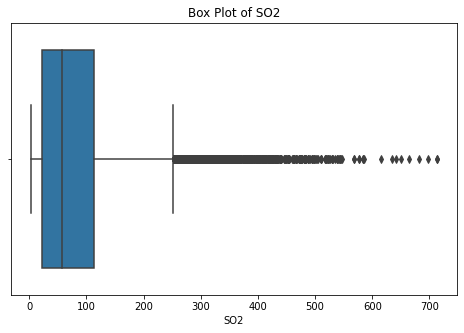

In [16]:
#add visualisation
import seaborn as sns
import matplotlib.pyplot as plt

pm25_data = df.select("PM25").toPandas()["PM25"]
plt.figure(figsize=(8, 5))
sns.boxplot(x=pm25_data)
plt.xlabel("PM2.5")
plt.title("Box Plot of PM2.5")
plt.show()

pm10_data = df.select("PM10").toPandas()["PM10"]
plt.figure(figsize=(8, 5))
sns.boxplot(x=pm25_data)
plt.xlabel("PM10")
plt.title("Box Plot of PM10")
plt.show()

so2_data = df.select("SO2").toPandas()["SO2"]
plt.figure(figsize=(8, 5))
sns.boxplot(x=pm25_data)
plt.xlabel("SO2")
plt.title("Box Plot of SO2")
plt.show()

In [6]:
pandas_df = df.toPandas()

def pollution_level(pm25):
    if pm25 <= 50:
        return 'Good'
    elif pm25 <= 100:
        return 'Moderate'
    elif pm25 <= 150:
        return 'Unhealthy for sensitive'
    elif pm25 <= 200:
        return 'Unhealthy'
    elif pm25 <= 300:
        return 'Very Unhealthy'
    elif pm25 <= 400:
        return 'Hazardous'
    else:
        return 'Very Hazardous'

pandas_df['Pollution Level'] = pandas_df['PM25'].apply(pollution_level)
level_counts = pandas_df['Pollution Level'].value_counts()
print(level_counts)

Good                       14624
Moderate                    7865
Unhealthy for sensitive     4290
Unhealthy                   2336
Very Unhealthy              1966
Hazardous                    584
Very Hazardous               211
Name: Pollution Level, dtype: int64


<AxesSubplot:title={'center':'Distribution of Pollution Levels'}, xlabel='Pollution Level', ylabel='count'>

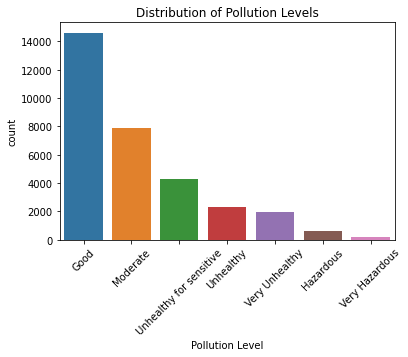

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xlabel('Pollution Level')
plt.ylabel('Count')
plt.title('Distribution of Pollution Levels')
plt.xticks(rotation=45)
sns.countplot(data=pandas_df, x='Pollution Level')

In [8]:
#merge data

df2 = spark.read.csv('Beijing2013-2017.csv', header=True, inferSchema=True)
df2 = df2.select('No', 'season')

merged_df = df.join(df2, on='No', how='inner')

merged_df.show()

+---+----+-----+---+----+----+----+----+-----+----+----+------+-----+----+----+----+------+
| No|year|month|day|hour|PM10| SO2| NO2|   CO|  O3|TEMP|  PRES| DEWP|RAIN|WSPM|PM25|season|
+---+----+-----+---+----+----+----+----+-----+----+----+------+-----+----+----+----+------+
|  1|2013|    3|  1|   0| 4.0| 4.0| 7.0|300.0|77.0|-0.7|1023.0|-18.8| 0.0| 4.4| 4.0|winter|
|  2|2013|    3|  1|   1| 8.0| 4.0| 7.0|300.0|77.0|-1.1|1023.2|-18.2| 0.0| 4.7| 8.0|winter|
|  3|2013|    3|  1|   2| 7.0| 5.0|10.0|300.0|73.0|-1.1|1023.5|-18.2| 0.0| 5.6| 7.0|winter|
|  4|2013|    3|  1|   3| 6.0|11.0|11.0|300.0|72.0|-1.4|1024.5|-19.4| 0.0| 3.1| 6.0|winter|
|  5|2013|    3|  1|   4| 3.0|12.0|12.0|300.0|72.0|-2.0|1025.2|-19.5| 0.0| 2.0| 3.0|winter|
|  6|2013|    3|  1|   5| 5.0|18.0|18.0|400.0|66.0|-2.2|1025.6|-19.6| 0.0| 3.7| 5.0|winter|
|  7|2013|    3|  1|   6| 3.0|18.0|32.0|500.0|50.0|-2.6|1026.5|-19.1| 0.0| 2.5| 3.0|winter|
|  8|2013|    3|  1|   7| 6.0|19.0|41.0|500.0|43.0|-1.6|1027.4|-19.1| 0.0| 3.8| 

+------+-----+
|season|count|
+------+-----+
|winter|11753|
|summer|12228|
|spring| 3984|
|autumn| 3911|
+------+-----+



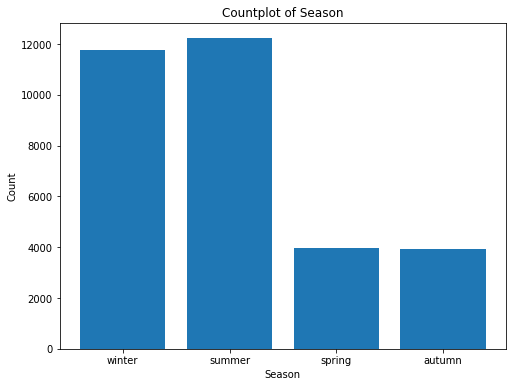

In [9]:
#visulize count
from pyspark.sql.functions import count
import matplotlib.pyplot as plt

season_counts = merged_df.groupBy('season').agg(count('*').alias('count'))
season_counts.show()
season_counts_pandas = season_counts.toPandas()

plt.figure(figsize=(8, 6))
plt.bar(season_counts_pandas['season'], season_counts_pandas['count'])
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Countplot of Season')
plt.show()

In [6]:
#drop more columns
column_to_delete = ["No", "year", "day"]
df = df.drop(*column_to_delete)
df.printSchema()

root
 |-- month: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- PM10: float (nullable = true)
 |-- SO2: float (nullable = true)
 |-- NO2: float (nullable = true)
 |-- CO: float (nullable = true)
 |-- O3: float (nullable = true)
 |-- TEMP: float (nullable = true)
 |-- PRES: float (nullable = true)
 |-- DEWP: float (nullable = true)
 |-- RAIN: float (nullable = true)
 |-- WSPM: float (nullable = true)
 |-- PM25: float (nullable = true)



In [7]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import ChiSqSelector


feature_cols =['month','hour','CO','NO2','SO2','WSPM','O3','TEMP','DEWP','RAIN','PRES']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data = assembler.transform(df)

selector = ChiSqSelector(numTopFeatures=10, featuresCol="features", outputCol="selectedFeatures", labelCol="PM25")
model = selector.fit(data)
selected_data = model.transform(data)
selected_data.select("selectedFeatures").show(truncate=False)
selected_indices = model.selectedFeatures
selected_feature_names = [feature_cols[i] for i in selected_indices]
print(selected_feature_names)

+--------------------------------------------------------------------------------------------+
|selectedFeatures                                                                            |
+--------------------------------------------------------------------------------------------+
|[3.0,0.0,300.0,7.0,4.0,4.400000095367432,77.0,-0.699999988079071,-18.799999237060547,0.0]   |
|[3.0,1.0,300.0,7.0,4.0,4.699999809265137,77.0,-1.100000023841858,-18.200000762939453,0.0]   |
|[3.0,2.0,300.0,10.0,5.0,5.599999904632568,73.0,-1.100000023841858,-18.200000762939453,0.0]  |
|[3.0,3.0,300.0,11.0,11.0,3.0999999046325684,72.0,-1.399999976158142,-19.399999618530273,0.0]|
|[3.0,4.0,300.0,12.0,12.0,2.0,72.0,-2.0,-19.5,0.0]                                           |
|[3.0,5.0,400.0,18.0,18.0,3.700000047683716,66.0,-2.200000047683716,-19.600000381469727,0.0] |
|[3.0,6.0,500.0,32.0,18.0,2.5,50.0,-2.5999999046325684,-19.100000381469727,0.0]              |
|[3.0,7.0,500.0,41.0,19.0,3.799999952316284,43.0,-

In [8]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
df_filled = df.toPandas()
X = df_filled.drop(['PM25'],axis=1)
y = df_filled['PM25']
selector = SelectKBest(score_func=f_regression, k=10)
selected_features = selector.fit_transform(X, y)
mask = selector.get_support()
scores = selector.scores_
    
feature_scores_df = pd.DataFrame({'Feature': X.columns, 'Score': scores})
sorted_features = feature_scores_df.sort_values(by='Score', ascending=False)

In [9]:
sorted_features

,Feature,Score
4,CO,51621.835396
3,NO2,28345.426673
2,SO2,10038.997858
10,WSPM,2843.320349
5,O3,902.914065
6,TEMP,511.988813
8,DEWP,509.992422
9,RAIN,13.396494
0,month,8.973441
1,hour,3.013252


In [7]:
from pyspark.sql.functions import col, skewness

threshold = 1.0
skewed_columns = []
for column in df.columns:
    skewness_value = df.select(skewness(col(column)).alias("skewness")).collect()[0]["skewness"]
    if abs(skewness_value) > threshold:
        skewed_columns.append(column)

if skewed_columns:
    print("Skewed Columns:", skewed_columns)
else:
    print("No Skewness")

Skewed Columns: ['SO2', 'CO', 'O3', 'RAIN', 'WSPM', 'PM25']


In [8]:
from pyspark.sql.functions import col, expr
from pyspark.sql import functions as F

selected_features = ['SO2', 'CO', 'O3', 'RAIN', 'WSPM', 'PM25']
df_trans_B = df

for feature in selected_features:
        df_trans_B = df_trans_B.withColumn(feature + '_BoxCox', expr(f'POW({feature}, 0.5)'))
df_trans_B.show()

+-----+----+----+----+-----+----+----+------+-----+----+----+----+------------------+------------------+------------------+-----------+------------------+------------------+
|month|hour| SO2| NO2|   CO|  O3|TEMP|  PRES| DEWP|RAIN|WSPM|PM25|        SO2_BoxCox|         CO_BoxCox|         O3_BoxCox|RAIN_BoxCox|       WSPM_BoxCox|       PM25_BoxCox|
+-----+----+----+----+-----+----+----+------+-----+----+----+----+------------------+------------------+------------------+-----------+------------------+------------------+
|    3|   0| 4.0| 7.0|300.0|77.0|-0.7|1023.0|-18.8| 0.0| 4.4| 4.0|               2.0|17.320508075688775| 8.774964387392123|        0.0|2.0976177190726224|               2.0|
|    3|   1| 4.0| 7.0|300.0|77.0|-1.1|1023.2|-18.2| 0.0| 4.7| 8.0|               2.0|17.320508075688775| 8.774964387392123|        0.0|2.1679482948781637|2.8284271247461903|
|    3|   2| 5.0|10.0|300.0|73.0|-1.1|1023.5|-18.2| 0.0| 5.6| 7.0|  2.23606797749979|17.320508075688775|  8.54400374531753|       

In [9]:
from pyspark.sql.functions import col, expr
from pyspark.sql import functions as F

selected_features = ['SO2', 'CO', 'O3', 'RAIN', 'WSPM', 'PM25']
df_trans = df

for feature in selected_features:
        df_trans = df_trans.withColumn(feature + '_Log', F.log(col(feature) + 1))
df_trans.show()

+-----+----+----+----+-----+----+----+------+-----+----+----+----+------------------+------------------+------------------+--------+------------------+------------------+
|month|hour| SO2| NO2|   CO|  O3|TEMP|  PRES| DEWP|RAIN|WSPM|PM25|           SO2_Log|            CO_Log|            O3_Log|RAIN_Log|          WSPM_Log|          PM25_Log|
+-----+----+----+----+-----+----+----+------+-----+----+----+----+------------------+------------------+------------------+--------+------------------+------------------+
|    3|   0| 4.0| 7.0|300.0|77.0|-0.7|1023.0|-18.8| 0.0| 4.4| 4.0|1.6094379124341003| 5.707110264748875| 4.356708826689592|     0.0| 1.686398971230864|1.6094379124341003|
|    3|   1| 4.0| 7.0|300.0|77.0|-1.1|1023.2|-18.2| 0.0| 4.7| 8.0|1.6094379124341003| 5.707110264748875| 4.356708826689592|     0.0|1.7404661413782472|2.1972245773362196|
|    3|   2| 5.0|10.0|300.0|73.0|-1.1|1023.5|-18.2| 0.0| 5.6| 7.0| 1.791759469228055| 5.707110264748875| 4.304065093204169|     0.0|1.88706963458

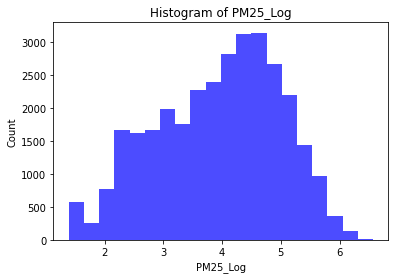

In [10]:
import matplotlib.pyplot as plt
hist_data = df_trans.select("PM25_Log").rdd.flatMap(lambda x: x).histogram(20)
hist_values = hist_data[1]
hist_bins = hist_data[0]
plt.hist(hist_bins[:-1], bins=hist_bins, weights=hist_values, color='blue', alpha=0.7)
plt.xlabel("PM25_Log")
plt.ylabel("Count")
plt.title("Histogram of PM25_Log")
plt.show()

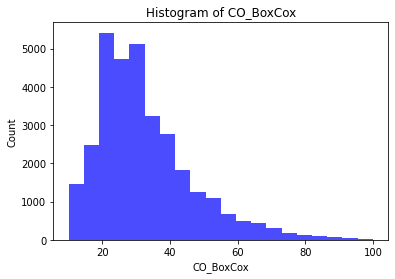

In [11]:
import matplotlib.pyplot as plt
hist_data = df_trans_B.select("CO_BoxCox").rdd.flatMap(lambda x: x).histogram(20)
hist_values = hist_data[1]
hist_bins = hist_data[0]
plt.hist(hist_bins[:-1], bins=hist_bins, weights=hist_values, color='blue', alpha=0.7)
plt.xlabel("CO_BoxCox")
plt.ylabel("Count")
plt.title("Histogram of CO_BoxCox")
plt.show()

In [7]:
#Build model Linear Regression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

feature_cols = ['month', 'hour', 'CO', 'NO2', 'SO2', 'WSPM', 'O3', 'TEMP', 'DEWP', 'RAIN']
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features_lr")
df = vector_assembler.transform(df)

train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)
lr = LinearRegression(featuresCol="features_lr", labelCol="PM25")
lr_model = lr.fit(train_data)
predictions = lr_model.transform(test_data)

predictions.select("prediction", "PM25", "features_lr").show(5)

23/10/10 07:24:08 WARN Instrumentation: [2e2e79d1] regParam is zero, which might cause numerical instability and overfitting.
23/10/10 07:24:11 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/10 07:24:11 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/10/10 07:24:12 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


+-------------------+-----+--------------------+
|         prediction| PM25|         features_lr|
+-------------------+-----+--------------------+
| 13.064039134859517| 13.0|[1.0,0.0,500.0,29...|
|-0.7373847366745636|  8.0|[1.0,0.0,600.0,9....|
| 11.066519687279456|  7.0|[1.0,0.0,700.0,9....|
|  27.61449317477959| 10.0|[1.0,0.0,300.0,33...|
| 342.36386415090874|395.0|[1.0,0.0,6900.0,1...|
+-------------------+-----+--------------------+
only showing top 5 rows



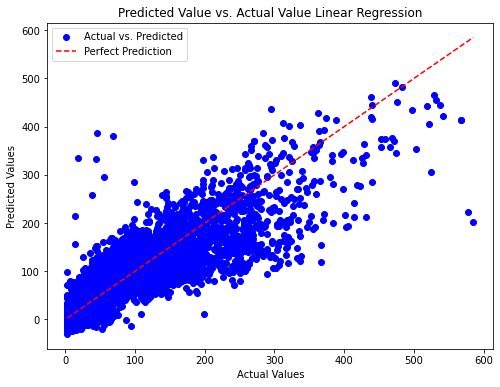

In [9]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

actual_values = predictions.select("PM25").rdd.flatMap(lambda x: x).collect()
predicted_values = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, c='blue', marker='o', label='Actual vs. Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Value vs. Actual Value Linear Regression')

plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], linestyle='--', color='red', label='Perfect Prediction')
plt.legend()
plt.show()

In [10]:
evaluator = RegressionEvaluator(labelCol="PM25", predictionCol="prediction", metricName="rmse")
rmse_lr = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) Linear Regression: {rmse_lr}")

mae_lr = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
r2_lr = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
mse_lr = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
print(f"Mean Absolute Error (MAE) Linear Regression: {mae_lr}")
print(f"R-squared (R2) Linear Regression: {r2_lr}")
print(f"Mean Squared Error (MSE) Linear Regression: {mse_lr}")

Root Mean Squared Error (RMSE) Linear Regression: 41.556150981822526


Mean Absolute Error (MAE) Linear Regression: 28.461320982369056
R-squared (R2) Linear Regression: 0.7249699427264588
Mean Squared Error (MSE) Linear Regression: 1726.9136844240293


In [7]:
#Build model GBT
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler

feature_cols = ['month', 'hour', 'CO', 'NO2', 'SO2', 'WSPM', 'O3', 'TEMP', 'DEWP', 'RAIN']
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features_gbt")
df = vector_assembler.transform(df)

train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)
gbt_regressor = GBTRegressor(featuresCol="features_gbt", labelCol="PM25", maxIter=10)
gbt_model = gbt_regressor.fit(train_data)
predictions = gbt_model.transform(test_data)

predictions.select("prediction", "PM25", "features_gbt").show(5)

+------------------+-----+--------------------+
|        prediction| PM25|        features_gbt|
+------------------+-----+--------------------+
|12.503988607058243| 13.0|[1.0,0.0,500.0,29...|
|13.988034186385617|  8.0|[1.0,0.0,600.0,9....|
|13.988034186385617|  7.0|[1.0,0.0,700.0,9....|
|11.970244930065718| 10.0|[1.0,0.0,300.0,33...|
| 423.3200358956415|395.0|[1.0,0.0,6900.0,1...|
+------------------+-----+--------------------+
only showing top 5 rows



23/10/10 06:47:54 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/10 06:47:54 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


In [ ]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

actual_values = predictions.select("PM25").rdd.flatMap(lambda x: x).collect()
predicted_values = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, c='blue', marker='o', label='Actual vs. Predicted')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Value vs. Actual Value GBTRegressor')

plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], linestyle='--', color='red', label='Perfect Prediction')
plt.legend()
plt.show()

In [9]:
evaluator = RegressionEvaluator(labelCol="PM25", predictionCol="prediction", metricName="rmse")
rmse_gbt = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) GBTRegressor: {rmse_gbt}")

mae_gbt = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
r2_gbt = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
mse_gbt = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
print(f"Mean Absolute Error (MAE) GBTRegressor: {mae_gbt}")
print(f"R-squared (R2) GBTRegressor: {r2_gbt}")
print(f"Mean Squared Error (MSE) GBTRegressor: {mse_gbt}")

Root Mean Squared Error (RMSE) GBTRegressor: 36.008758705206404


Mean Absolute Error (MAE) GBTRegressor: 24.102813040686655
R-squared (R2) GBTRegressor: 0.7934972547499586
Mean Squared Error (MSE) GBTRegressor: 1296.630703489778


In [8]:
#Feature Importance GBT
feature_importance = gbt_model.featureImportances
feature_importance_dict = {feature_cols[i]: feature_importance[i] for i in range(len(feature_cols))}

print("GBT Regressor Feature Importance:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

GBT Regressor Feature Importance:
month: 0.11710288159099458
hour: 0.017405105112677684
CO: 0.4979450909111288
NO2: 0.0954399751743395
SO2: 0.06765171674134153
WSPM: 0.0018885573835885896
O3: 0.05440039127806462
TEMP: 0.014181067153876889
DEWP: 0.12953526869402157
RAIN: 0.004449945959966301


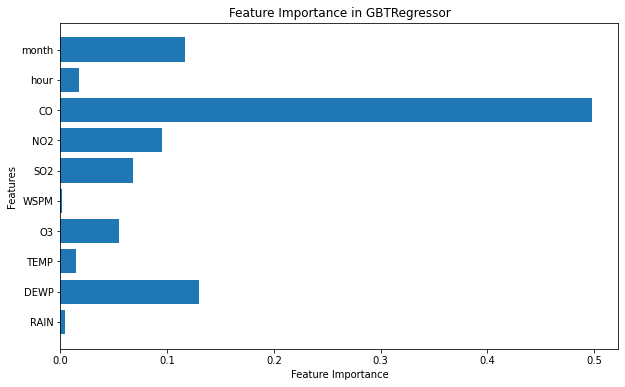

In [10]:
import matplotlib.pyplot as plt

features = list(feature_importance_dict.keys())
importance_scores = list(feature_importance_dict.values())

plt.figure(figsize=(10, 6))
plt.barh(features, importance_scores)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in GBTRegressor')
plt.gca().invert_yaxis()
plt.show()

In [7]:
#Build model Random Forest
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler

feature_cols = ['month', 'hour', 'CO', 'NO2', 'SO2', 'WSPM', 'O3', 'TEMP', 'DEWP', 'RAIN']
vector_assembler = VectorAssembler(inputCols=feature_cols, outputCol="features_rf")
df = vector_assembler.transform(df)

train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)
rf_regressor = RandomForestRegressor(featuresCol="features_rf", labelCol="PM25", numTrees=100)
rf_model = rf_regressor.fit(train_data)
predictions = rf_model.transform(test_data)

predictions.select("prediction", "PM25", "features_rf").show(5)

+------------------+----+--------------------+
|        prediction|PM25|         features_rf|
+------------------+----+--------------------+
|18.627323332459277|10.0|[1.0,0.0,300.0,33...|
| 16.74083694462409|13.0|[1.0,0.0,500.0,29...|
|16.285437851545424|13.0|[1.0,0.0,600.0,22...|
|21.693341332493198|19.0|[1.0,0.0,700.0,35...|
|19.219742836495225|14.0|[1.0,0.0,700.0,29...|
+------------------+----+--------------------+
only showing top 5 rows



In [8]:
evaluator = RegressionEvaluator(labelCol="PM25", predictionCol="prediction", metricName="rmse")
rmse_rf = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) Random Forest: {rmse_rf}")

mae_rf = evaluator.evaluate(predictions, {evaluator.metricName: "mae"})
r2_rf = evaluator.evaluate(predictions, {evaluator.metricName: "r2"})
mse_rf = evaluator.evaluate(predictions, {evaluator.metricName: "mse"})
print(f"Mean Absolute Error (MAE) Random Forest: {mae_rf}")
print(f"R-squared (R2) Random Forest: {r2_rf}")
print(f"Mean Squared Error (MSE) Random Forest: {mse_rf}")

Root Mean Squared Error (RMSE) Random Forest: 39.36506108272249


Mean Absolute Error (MAE) Random Forest: 26.698200001526015
R-squared (R2) Random Forest: 0.7532078237613329
Mean Squared Error (MSE) Random Forest: 1549.6080340464725


In [8]:
#Feature Importance Random Forest
feature_importance = rf_model.featureImportances
feature_importance_dict = {feature_cols[i]: feature_importance[i] for i in range(len(feature_cols))}

print("Random Forest Regressor Feature Importance:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

Random Forest Regressor Feature Importance:
month: 0.009952484460290047
hour: 0.0008769991177929651
CO: 0.5440074477900736
NO2: 0.2565145811902493
SO2: 0.07948508657772041
WSPM: 0.008935468099201071
O3: 0.03497483843263439
TEMP: 0.014910052217898626
DEWP: 0.050012227330705025
RAIN: 0.00033081478343451986


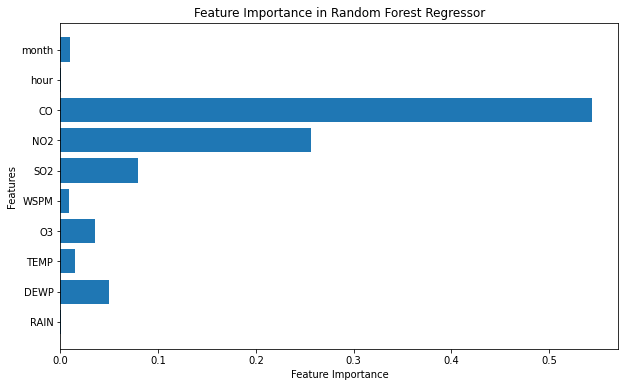

In [9]:
import matplotlib.pyplot as plt

features = list(feature_importance_dict.keys())
importance_scores = list(feature_importance_dict.values())

plt.figure(figsize=(10, 6))
plt.barh(features, importance_scores)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()

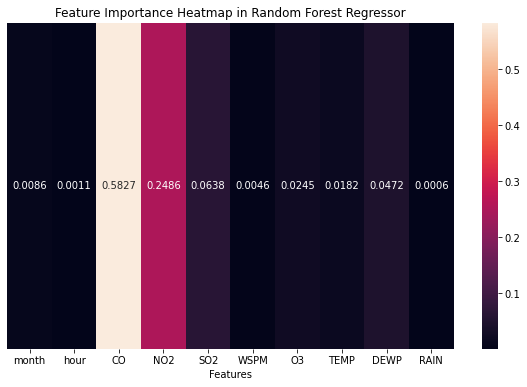

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap([importance_scores], annot=True, fmt=".4f", xticklabels=features, yticklabels=False)
plt.xlabel('Features')
plt.title('Feature Importance Heatmap in Random Forest Regressor')
plt.show()

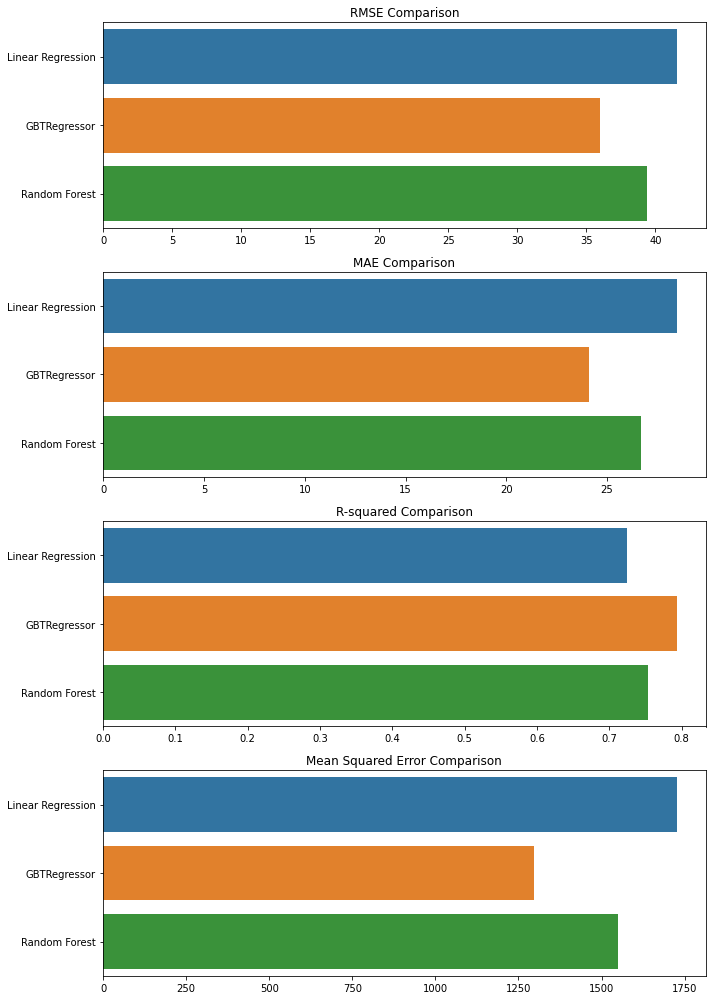

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
models = ['Linear Regression', 'GBTRegressor', 'Random Forest']
rmse_values = [rmse_lr, rmse_gbt, rmse_rf]
mae_values = [mae_lr, mae_gbt, mae_rf]
r_squared_values = [r_squared_lr, r_squared_gbt, r_squared_rf]
mse_values = [mse_lr, mse_gbt, mse_rf]


fig, axes = plt.subplots(4, 1, figsize=(10, 14))
sns.barplot(x=rmse_values, y=models, ax=axes[0])
axes[0].set_title('RMSE Comparison')

sns.barplot(x=mae_values, y=models, ax=axes[1])
axes[1].set_title('MAE Comparison')

sns.barplot(x=r_squared_values, y=models, ax=axes[2])
axes[2].set_title('R-squared Comparison')

sns.barplot(x=mse_values, y=models, ax=axes[3])
axes[3].set_title('Mean Squared Error Comparison')

plt.tight_layout()
plt.show()

In [ ]:
#Learning Curve
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import TrainValidationSplit
from pyspark.ml.feature import VectorAssembler
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve_spark(model, title, train, metric_name, param_name, param_values):
    train_sizes = []
    train_scores = []
    test_scores = []

    for param_value in param_values:
        param = {param_name: param_value}
        param_model = model.copy(param)
        train_model = param_model.fit(train)
        predictions = train_model.transform(train)
        evaluator = RegressionEvaluator(metricName=metric_name)
        train_score = evaluator.evaluate(predictions)
        train_sizes.append(param_value)
        train_scores.append(train_score)
        test_scores.append(test_score)

    plt.figure()
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(metric_name)
    plt.grid()

    plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

    return plt

feature_cols = ['month', 'hour', 'CO', 'NO2', 'SO2', 'WSPM', 'O3', 'TEMP', 'DEWP', 'RAIN']
assembler = VectorAssembler(inputCols=feature_cols, outputCol='PM25')
assembled_df = assembler.transform(df).select('features', 'PM25')

param_name = "Training examples"
param_values = [0.01, 0.1, 1.0, 10.0]

title = "Learning Curves (Linear Regression)"
metric_name = "rmse"
plot_learning_curve_spark(lr_model, title, assembled_df, metric_name, param_name, param_values)

plt.show()